# Linear and Nonlinear SVM Classification
Since this dataset is very small (178 entries), we can see a very small difference between linear and nonlinear performance

# Loading Dataset

In [103]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
df = load_wine(as_frame = True)

In [104]:
df.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [105]:
df.target.describe()

count    178.000000
mean       0.938202
std        0.775035
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [106]:
df.data.shape

(178, 13)

In [107]:
df.target.shape

(178,)

## Correlations

Observing the correlation dataframe and graphs that have somewhat of a linear trend in the correlation matrix, these are the highest correlating features:

In [108]:
# Highest correlating attributes: attr1 and attr2 and the correlation between them, sorted by top correlating
def get_correlations(df, size):
  corrs = {'attr1': [], 'attr2': [], 'corr': []}

  for attr1 in df.columns:
    for attr2 in df.columns:
      if attr1 != attr2:
        corrs['attr1'].append(attr1)
        corrs['attr2'].append(attr2)
        corrs['corr'].append(df[attr1].corr(df[attr2]))

  return pd.DataFrame(corrs).sort_values('corr', ascending=False).head(size)

In [109]:
get_correlations(df.data, 8)

,attr1,attr2,corr
65,total_phenols,flavanoids,0.864564
77,flavanoids,total_phenols,0.864564
138,od280/od315_of_diluted_wines,flavanoids,0.787194
82,flavanoids,od280/od315_of_diluted_wines,0.787194
137,od280/od315_of_diluted_wines,total_phenols,0.699949
70,total_phenols,od280/od315_of_diluted_wines,0.699949
102,proanthocyanins,flavanoids,0.652692
79,flavanoids,proanthocyanins,0.652692


array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='malic_acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='ash', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcalinity_of_ash', ylabel='alcohol'>,
        <AxesSubplot:xlabel='magnesium', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='alcohol'>,
        <AxesSubplot:xlabel='flavanoids', ylabel='alcohol'>,
        <AxesSubplot:xlabel='nonflavanoid_phenols', ylabel='alcohol'>,
        <AxesSubplot:xlabel='proanthocyanins', ylabel='alcohol'>,
        <AxesSubplot:xlabel='color_intensity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='hue', ylabel='alcohol'>,
        <AxesSubplot:xlabel='od280/od315_of_diluted_wines', ylabel='alcohol'>,
        <AxesSubplot:xlabel='proline', ylabel='alcohol'>,
        <AxesSubplot:xlabel='target', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>,
        <AxesSubplot:xlabel='malic_acid', ylabel='malic_acid'

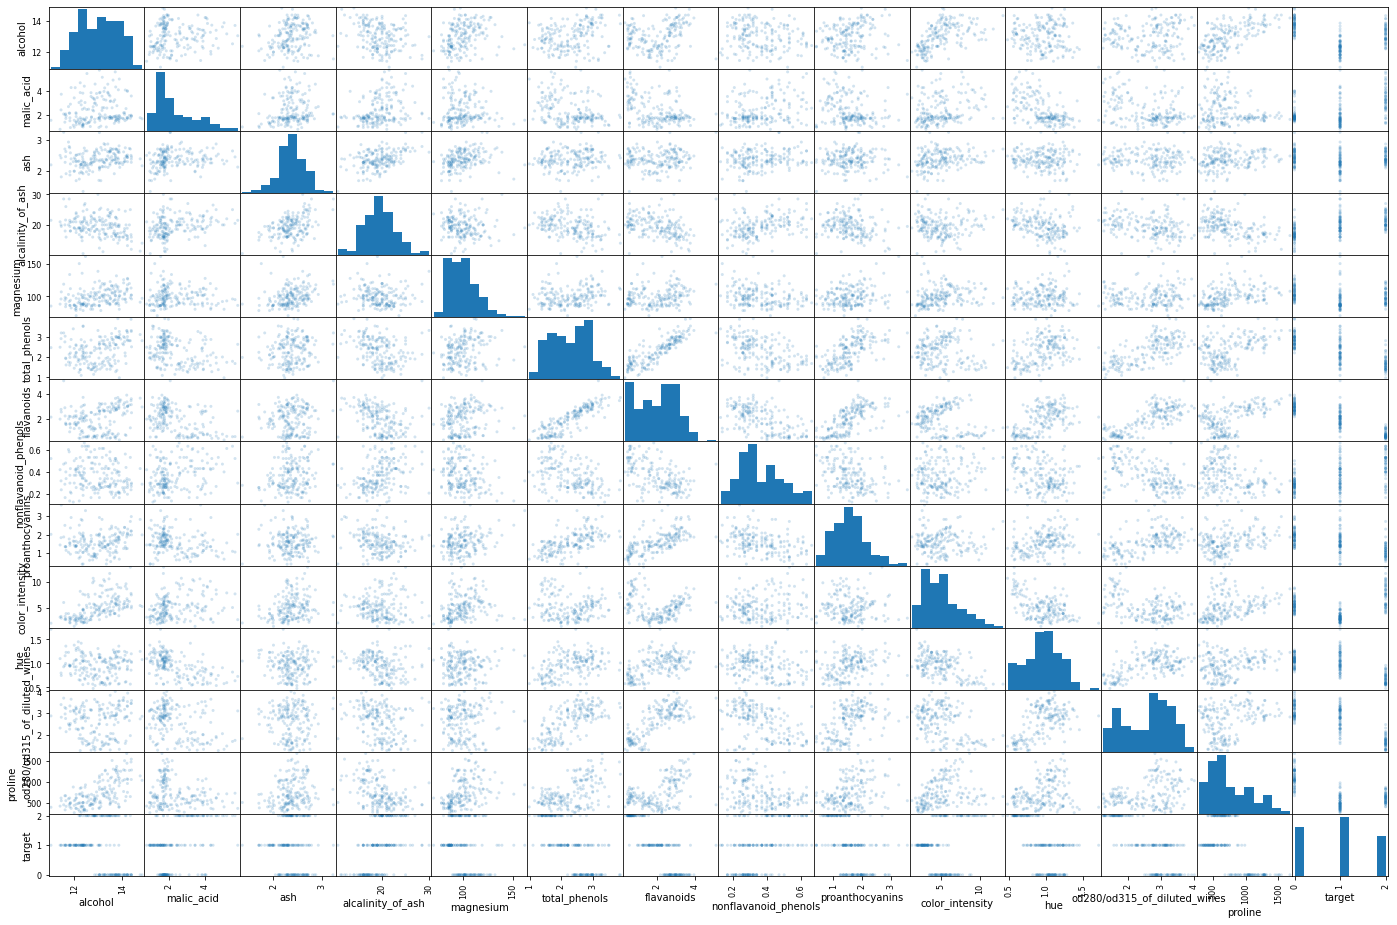

In [110]:
pd.plotting.scatter_matrix(df.frame, figsize=(24, 16), alpha=0.2)

<AxesSubplot:xlabel='total_phenols', ylabel='flavanoids'>

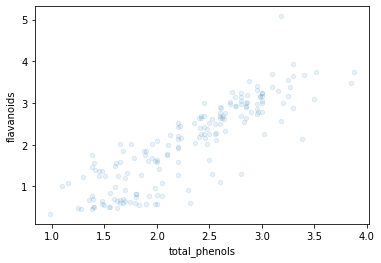

In [111]:
df.frame.plot(kind="scatter", x="total_phenols", y="flavanoids", alpha=0.1)

## Preprocessing

Preprocessing the data as necessary to ensure that all values can be processed by a classification model. However, since this dataset is small and does not have many variations, we can skip normalization/standardization

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

# Create pipeline with standard scaler
lin_svm_pipeline = Pipeline([
  ("linear_svc", LinearSVC(C=1, loss="hinge"))
])
poly_svm_pipeline = Pipeline([
    ("poly_Features", PolynomialFeatures(degree=3)),
    ("poly_svc", LinearSVC(C=10, loss="hinge"))
])

In [119]:
from sklearn.model_selection import train_test_split


# Split into validation set and training set
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.35, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((115, 13), (63, 13), (115,), (63,))

# Linear SVM
Accuracy: 0.8095238095238095 <br>
Precision: 0.8712998712998712 <br>
Recall: 0.8095238095238095 <br>
f1 Score: 0.80861632990665261 <br>

In [120]:
svm_lin_clf = lin_svm_pipeline.fit(X_train, y_train)

C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [135]:
# Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score

svm_lin_cls_scores = cross_val_score(svm_lin_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
svm_cls_rmse_scores = np.sqrt(-svm_lin_cls_scores)
svm_cls_rmse_scores

C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

array([0.58976782, 0.29488391, 0.36115756, 0.41702883, 1.06321907])

In [122]:
# Prediction (Evaluating with test-set)
pred_lin_svm = svm_lin_clf.predict(X_test)

print("Predictions:", list(pred_lin_svm))
print("Labels     :", list(y_test))

Predictions: [0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2]
Labels     : [2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2]


In [123]:
# Accuracy
accuracy = svm_lin_clf.score(X_test, y_test)
accuracy

0.8095238095238095

In [124]:
from sklearn.metrics import precision_score

# Precision Score
precision_score(y_test, pred_lin_svm, average = "weighted" )

0.8712998712998712

In [125]:
from sklearn.metrics import recall_score

# Recall Score
recall_score(y_test, pred_lin_svm, average = "weighted")

0.8095238095238095

In [126]:
from sklearn.metrics import f1_score

# f1 score
f1_score(y_test, pred_lin_svm, average= "weighted")

0.8086163299066526

# Nonlinear SVM
Accuracy: 0.8253968253968254 <br>
Precision: 0.864584217525394 <br>
Recall: 0.8253968253968254 <br>
f1 Score: 0.8105039729066426 <br>

In [127]:
svm_poly_clf = lin_svm_pipeline.fit(X_train, y_train)

C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [136]:
# Accuracy Using Cross-Validation
from sklearn.model_selection import cross_val_score

svm_poly_clf_scores = cross_val_score(svm_poly_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
svm_poly_clf_scores = np.sqrt(-svm_poly_clf_scores)
svm_poly_clf_scores

C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Willi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

array([0.29488391, 0.20851441, 0.36115756, 0.55167728, 0.58976782])

In [129]:
# Prediction (Evaluating with test-set)
pred_poly_svm = svm_poly_clf.predict(X_test)

print("Predictions:", list(pred_poly_svm))
print("Labels     :", list(y_test))

Predictions: [2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2]
Labels     : [2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2]


In [130]:
# Accuracy
accuracy = svm_poly_clf.score(X_test, y_test)
accuracy

0.8253968253968254

In [131]:
from sklearn.metrics import precision_score

# Precision Score
precision_score(y_test, pred_poly_svm, average = "weighted" )

0.864584217525394

In [132]:
from sklearn.metrics import recall_score

# Recall Score
recall_score(y_test, pred_poly_svm, average = "weighted")

0.8253968253968254

In [133]:
from sklearn.metrics import f1_score

# f1 score
f1_score(y_test, pred_poly_svm, average= "weighted")

0.8105039729066426